### Common-pool resource simulation 

The following is a simulation of how a community can govern a common resource through a reputation and an identity mechanism. 

**Common-pool resources**

Common-pool resources are publicly available, collectively-managed resources that “add [...] to our sense of belonging.” (Standing, 2019, p.32). The resources that such a system can govern can be of five types: 
- Natural commons – common natural resources like water, land or wind, now often expanded to our planetary climate system; 
- Social commons – community-owned social services like housing, transport services, and healthcare; 
- Civil commons – public institutions of justice that rely on due process and rule-following of all agents involved; 
- Cultural commons –  cultural goods that thrive through collective exchange and enjoyment like arts, sports, media and the infrastructures for them; 
- Knowledge commons – publicly exchanged information, ideas and learning processes.

**Cooperation mechanisms**

There are two relevant mechanisms that can support successful cooperation in community-based resource governance. 
- A reputation-based mechanism, where individual agents develop trust towards each other through conditional reciprocity, leading to cooperation or punishment for defectors. 
- An identity-based mechanism that relies on social norms, which agents learn through observation of others, and which interact with each agent's identification with and affective commitment towards the group. 

**Theoretical hypotheses**


These two parallel mechanisms together constitute a novel cognitive-behavioral framework of CPR governance which yields testable hypotheses about the effects of several key intervention variables on system-level beliefs and behaviors.

These hypotheses are:
1. Directed, incomplete networks should sustain cooperation levels equally as high as complete networks while maintaining more idealistic social norms due to overestimation of others’ appropriation (Shreedhar et al., 2018).
2. Cooperation should be higher in groups with homogeneously high levels of identification than in groups with more heterogeneous levels of identification (Habyarimana et al., 2007).
3. Increased resource levels should correlate with increased identification and affective commitment as the system moves from an exploitation towards a conservation phase (Mosimane et al., 2012). 
4. The reputation and identity mechanisms in isolation will result in less cooperation and less sustainable resource use than the combination of the two mechanisms (Bergami & Bagozzi, 2000). 
5. Revealing everyone’s current strategy for resource use should increase cooperation through reputation mechanisms in groups larger than 20 (Aflagah et al., 2019).

**System and agents**

Simulating a complex system with ecological, social, economic, and cognitive variables requires making some simplifications and assumptions, which follow from the literature. The model looks at a resource-using community with clear boundaries to its users, as Ostrom (1990) suggests. There are several micro-situational variables that are set to fixed or initial levels. These include:
- Network size, which is bounded at $ N = 20 $, to implement a community small enough to show cooperation without system-wide communication, as predicted in Aflagah et al. (2019). 
- Resource stock, which starts at level $ R = 100 $
- The rate of return $ r_i $, denoting the natural increase in the resource per community member at each time period. This model works with $r_i= 0.9$ resource units, which means that if agents use more than nine tenths of their capacity for extraction per round, they will use more than the natural replenishment and deplete the resource. Without human resource use, the resource would naturally increases at the rate $ R(t) = R(t-1) + N r_i $

Following my cognitive-behavioral framework of CPR governance, each agent holds a number of beliefs which produce behavior. The core variables encoding these beliefs are:
- Social norms distribution of expected cooperation $ p (c) $
- Affective commitment towards cooperation $ A_i $
- Identification with the community $ Q_i $

The key behavior that emerges as the result of these beliefs is each agent’s current use $ u_i(t) $ of the resource at time step $ t $, that results from their beliefs and motivations such that:
$ u_i(t) = r_i (1 - p(c) A_i) $

The use of the resource, following the cognitive-behavioral framework, depends on 
the social norms the agent holds which regulate their probability of cooperation $p(c)$, following the work of Xiang et al. (2013), and their potential loss in identity from defecting which is driven by their affective commitment $ A_i $, following the work of Jussila et al. (2012). 

The use of the resource by the agent increases their wealth such that $ w_i(t+1) =w_i(t) +  u_i(t) - Y $, where
- $w_i(t+1)$ is the agent’s wealth after the round,
- $w_i(t)$ is the agent’s previous wealth, initialized at $w_i(t) = 0$ at $t = 0$,
- $Y$ are the agent’s needs for that round, which are half of the potential use, allowing for wealth accumulation and resource sustainability, but would have to be adjusted to the micro-situational circumstances of a community and its resource.

Finally, the agents update their current social norms, as well as their identification with and affective commitment towards the community and its goals according to their observations of the agents they are connected to in the network structure of the community. 

The identification and affective commitment further serve as indicators of the sense of belonging that agents feel in their community, an expression of the social utility that the CPR governance scheme provides to individuals beyond the economic utility captured by the wealth variable.

**Initiating the model**

I first access the model from its path in the Jupyter Notebook directory. You can find the Simulation Class for download in the cprsim.py file in this Github Repo. Store it in your local directory in a folder called 'cprsim', which should allow you to access the file with the below path.

In [15]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import cprsim
from cprsim import cprsim
from cprsim.cprsim import CPRSim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Testing Hypothesis 1: The effect of network structure on cooperation 

I compare the outcomes of a community interacting after 10 time steps with a Barabasi-Albert, a directed incomplete random k-out graph, and a complete graph as network structures. 
The literature predicts that directed, incomplete networks should sustain cooperation at equally as high levels as complete networks while maintaining more idealistic social norms due to overestimation of others’ appropriation. 

**1. The complete network**

In the complete network, all agents are connected to each other and can observe everyone else's cooperation levels.

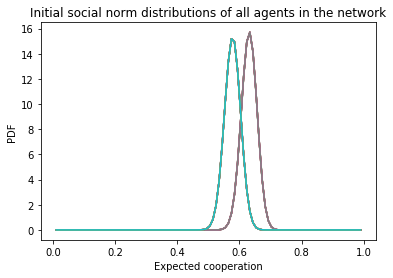

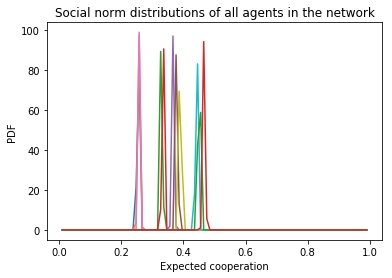

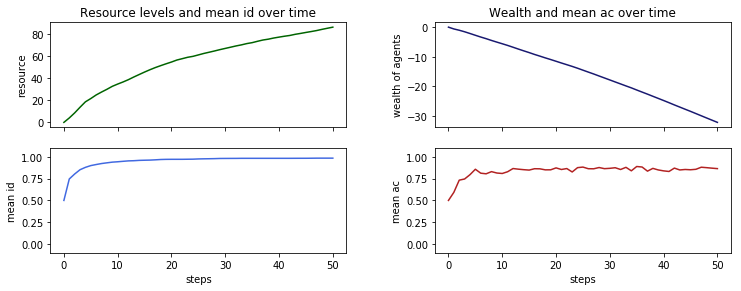

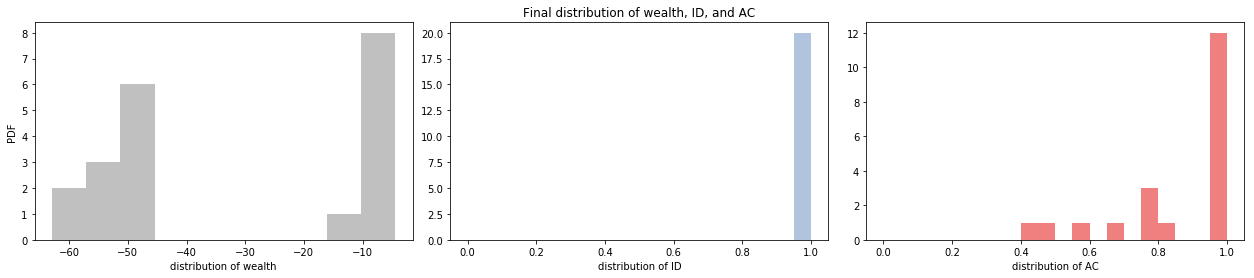

Final resource level: 86.15
Final average wealth: -32.2
Final mean identification: 0.98
Final mean affective commitment: 0.86
Sanctions per round per person: 9.58


In [2]:
complete_network = CPRSim(network = 'complete',markup=True)
complete_network.simulate(50)

Observations:
- The community where all agents are connected maintains the resource successfully and it rises continuously.
- The complete network leads to somewhat varied but very confident social norms in a range between $p(c) \in [0.2,0.5]$
- Wealth falls for all agents, with two groups becoming apparent, one which loses a little, and another that loses a lot. Average sanctions per round are very high, the average agent punishes half the community in every round.
- Identification and affective commitment increase, although a group of agents has lower affective commitment.

However, these are only findings from running one simulation, a series of simulations to find the average outcome will show results that we can be more confident in. Since all four key outcome variables seem to take stable development after 20 time-steps, we will only test until then to be efficient with computational resources.

In [5]:
wealth_complete = []
resource_complete = []
ident_complete = []
aff_comm_complete = []

for _ in range(30):
    complete_test = CPRSim(network='complete')
    complete_test.simulate(20)
    wealth_complete.append(complete_test.wealth[-1])
    resource_complete.append(complete_test.resource_over_time[-1]) 
    ident_complete.append(complete_test.id_over_time[-1])
    aff_comm_complete.append(complete_test.ac_over_time[-1])

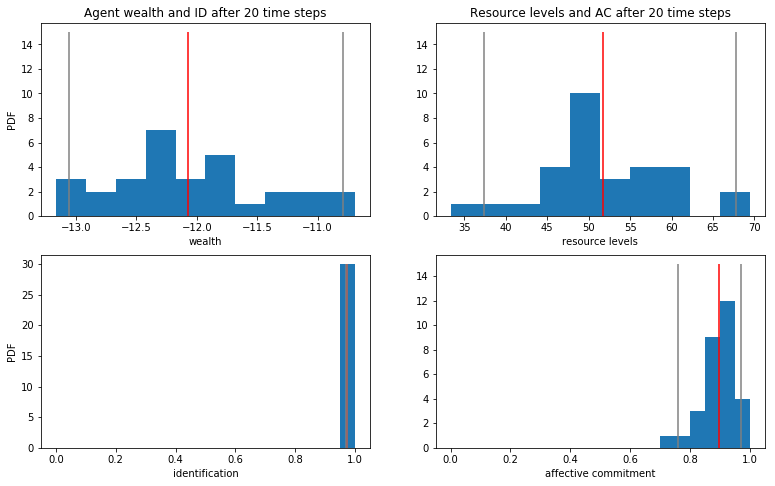

Esimates for means after 20 time-steps in a complete network
Wealth: -12.07
CI:[ -13.06 , -10.79 ]
Resource level: 51.77
CI:[ 37.34 , 67.77 ]
Identification: 0.97
CI:[ 0.97 , 0.97 ]
Affective commitment: 0.9
CI:[ 0.76 , 0.97 ]


In [30]:
_max_ = 15
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].hist(wealth_complete)
axs[0,0].set(title='Agent wealth and ID after 20 time steps',xlabel='wealth',ylabel='PDF')
axs[0,0].vlines(np.percentile(wealth_complete,2.5),0,_max_,color='grey')
axs[0,0].vlines(np.mean(wealth_complete),0,_max_,color='red')
axs[0,0].vlines(np.percentile(wealth_complete,97.5),0,_max_,color='grey')

axs[0,1].hist(resource_complete)
axs[0,1].set(title='Resource levels and AC after 20 time steps',xlabel='resource levels')
axs[0,1].vlines(np.percentile(resource_complete,2.5),0,_max_,color='grey')
axs[0,1].vlines(np.mean(resource_complete),0,_max_,color='red')
axs[0,1].vlines(np.percentile(resource_complete,97.5),0,_max_,color='grey')

axs[1,0].hist(ident_complete,bins=20,range=(0,1))
axs[1,0].set(xlabel='identification',ylabel='PDF')
axs[1,0].vlines(np.percentile(ident_complete,2.5),0,30,color='grey')
axs[1,0].vlines(np.mean(ident_complete),0,30,color='red')
axs[1,0].vlines(np.percentile(ident_complete,97.5),0,30,color='grey')

axs[1,1].hist(aff_comm_complete,bins=20,range=(0,1))
axs[1,1].set(xlabel='affective commitment')
axs[1,1].vlines(np.percentile(aff_comm_complete,2.5),0,_max_,color='grey')
axs[1,1].vlines(np.mean(aff_comm_complete),0,_max_,color='red')
axs[1,1].vlines(np.percentile(aff_comm_complete,97.5),0,_max_,color='grey')
plt.show()

print("Esimates for means after 20 time-steps in a complete network")
print("Wealth:",round(np.mean(wealth_complete),2))
print('CI:[',round(np.percentile(wealth_complete,2.5),2),",",round(np.percentile(wealth_complete,97.5),2),']')
print("Resource level:",round(np.mean(resource_complete),2))
print('CI:[',round(np.percentile(resource_complete,2.5),2),",",round(np.percentile(resource_complete,97.5),2),']')
print("Identification:",round(np.mean(ident_complete),2))
print('CI:[',round(np.percentile(ident_complete,2.5),2),",",round(np.percentile(ident_complete,97.5),2),']')
print("Affective commitment:",round(np.mean(aff_comm_complete),2))
print('CI:[',round(np.percentile(aff_comm_complete,2.5),2),",",round(np.percentile(aff_comm_complete,97.5),2),']')

After running 30 simulations and obtaining better estimates for the means, the results from the one simulation hold: 
- Wealth falls significantly in all simulations.
- Resource levels rise significantly in all simulations.
- Identification stabilizies at 0.97.
- Affective commitment balances at around 0.9, with some variations. 

**2. The Barabasi Albert network**

This network has a small-world network structure where some highly connected nodes connect different clusters together. Agents have bidirectional links, they observe each other's cooperation. 

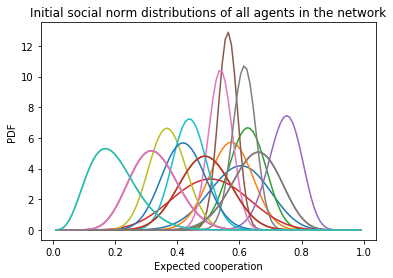

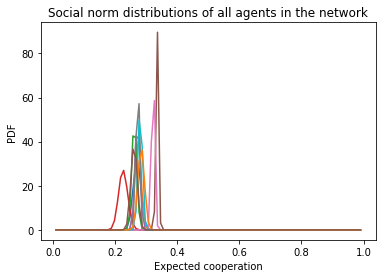

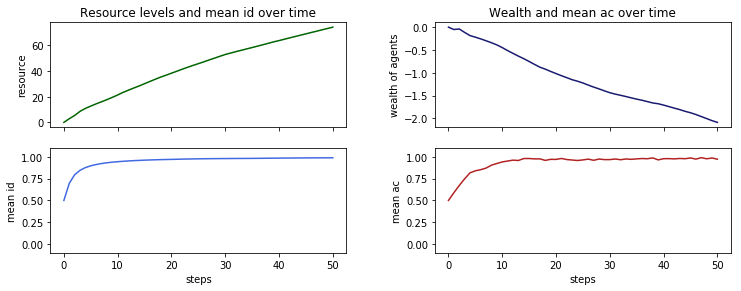

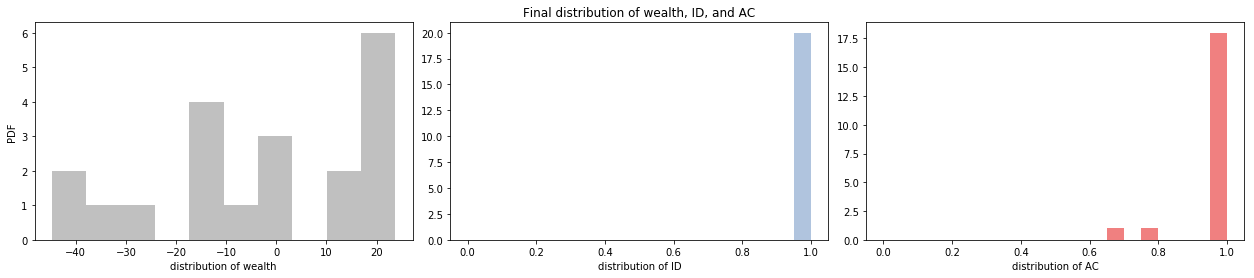

Final resource level: 74.29
Final average wealth: -2.09
Final mean identification: 0.99
Final mean affective commitment: 0.97
Sanctions per round per person: 3.67


In [3]:
BA_network = CPRSim(network = 'BA',markup=True)
BA_network.simulate(50)

Observations from one simulation:
- The community with a small-world network and a power-law degree distribution also successfully maintains the resource, resource levels rise almost as high as in the complete network configuration.
- Social norms converge more in a range around $p(c) \in [0.2,0.4]$ and agents are somewhat less confident in their social norms, which can be seen in the wider variances in the individual social norm distributions.
- Average wealth also falls, albeit not by much. Wealth is unevenly distributed, some agents accumulate wealth, while others lose out. Agents enforce far fewer sanctions than in the complete network.
- Identification rises to almost 1, while affective commitment does not quite reach that value since some agents still have lower commitment, although the average value is higher than in the complete network.

In [31]:
wealth_BA = []
resource_BA = []
ident_BA = []
aff_comm_BA = []

for _ in range(30):
    BA_test = CPRSim(network='BA')
    BA_test.simulate(20)
    wealth_BA.append(BA_test.wealth[-1])
    resource_BA.append(BA_test.resource_over_time[-1]) 
    ident_BA.append(BA_test.id_over_time[-1])
    aff_comm_BA.append(BA_test.ac_over_time[-1])

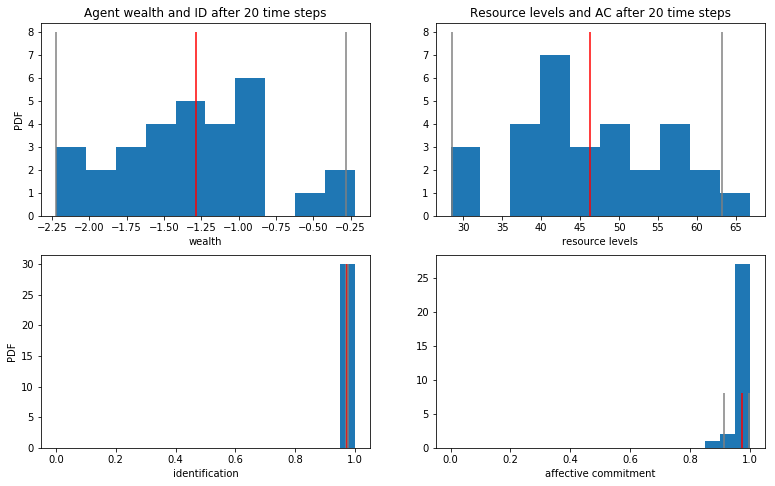

Esimates for means after 20 time-steps in a complete network
Wealth: -1.29
CI:[ -2.22 , -0.28 ]
Resource level: 46.25
CI:[ 28.54 , 63.19 ]
Identification: 0.97
CI:[ 0.97 , 0.98 ]
Affective commitment: 0.97
CI:[ 0.91 , 1.0 ]


In [34]:
_max_ = 8
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].hist(wealth_BA)
axs[0,0].set(title='Agent wealth and ID after 20 time steps',xlabel='wealth',ylabel='PDF')
axs[0,0].vlines(np.percentile(wealth_BA,2.5),0,_max_,color='grey')
axs[0,0].vlines(np.mean(wealth_BA),0,_max_,color='red')
axs[0,0].vlines(np.percentile(wealth_BA,97.5),0,_max_,color='grey')

axs[0,1].hist(resource_BA)
axs[0,1].set(title='Resource levels and AC after 20 time steps',xlabel='resource levels')
axs[0,1].vlines(np.percentile(resource_BA,2.5),0,_max_,color='grey')
axs[0,1].vlines(np.mean(resource_BA),0,_max_,color='red')
axs[0,1].vlines(np.percentile(resource_BA,97.5),0,_max_,color='grey')

axs[1,0].hist(ident_BA,bins=20,range=(0,1))
axs[1,0].set(xlabel='identification',ylabel='PDF')
axs[1,0].vlines(np.percentile(ident_BA,2.5),0,30,color='grey')
axs[1,0].vlines(np.mean(ident_BA),0,30,color='red')
axs[1,0].vlines(np.percentile(ident_BA,97.5),0,30,color='grey')

axs[1,1].hist(aff_comm_BA,bins=20,range=(0,1))
axs[1,1].set(xlabel='affective commitment')
axs[1,1].vlines(np.percentile(aff_comm_BA,2.5),0,_max_,color='grey')
axs[1,1].vlines(np.mean(aff_comm_BA),0,_max_,color='red')
axs[1,1].vlines(np.percentile(aff_comm_BA,97.5),0,_max_,color='grey')
plt.show()

print("Esimates for means after 20 time-steps in a complete network")
print("Wealth:",round(np.mean(wealth_BA),2))
print('CI:[',round(np.percentile(wealth_BA,2.5),2),",",round(np.percentile(wealth_BA,97.5),2),']')
print("Resource level:",round(np.mean(resource_BA),2))
print('CI:[',round(np.percentile(resource_BA,2.5),2),",",round(np.percentile(resource_BA,97.5),2),']')
print("Identification:",round(np.mean(ident_BA),2))
print('CI:[',round(np.percentile(ident_BA,2.5),2),",",round(np.percentile(ident_BA,97.5),2),']')
print("Affective commitment:",round(np.mean(aff_comm_BA),2))
print('CI:[',round(np.percentile(aff_comm_BA,2.5),2),",",round(np.percentile(aff_comm_BA,97.5),2),']')

After running 30 simulations with the BA network and obtaining better estimates for the means, the results from the one simulation also hold: 
- Wealth falls in all simulations, although only slightly.
- The resource level increases significantly in all simulations.
- Identification rises to 0.97 with an upper bound at 0.98.
- Affective commitment rises to around 0.97, with some variation.

**3. The directed, incomplete network**

In this network structure, all agents observe five other agents who cannot observe them back. 

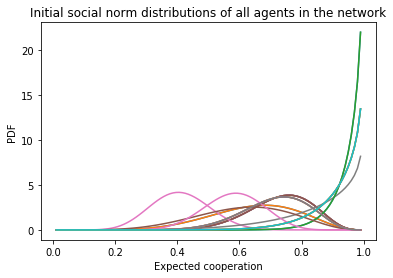

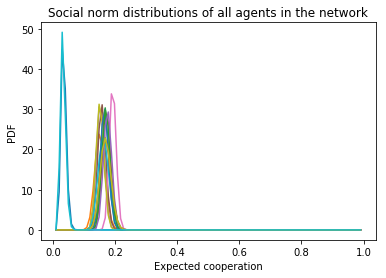

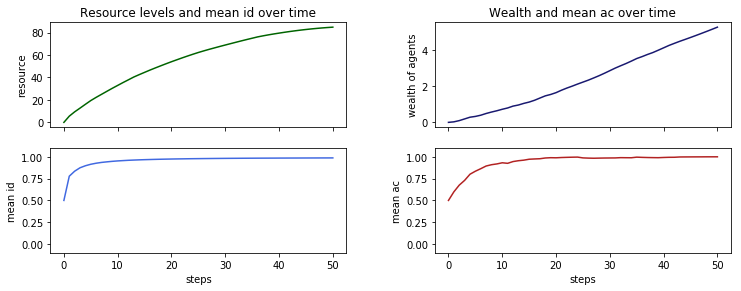

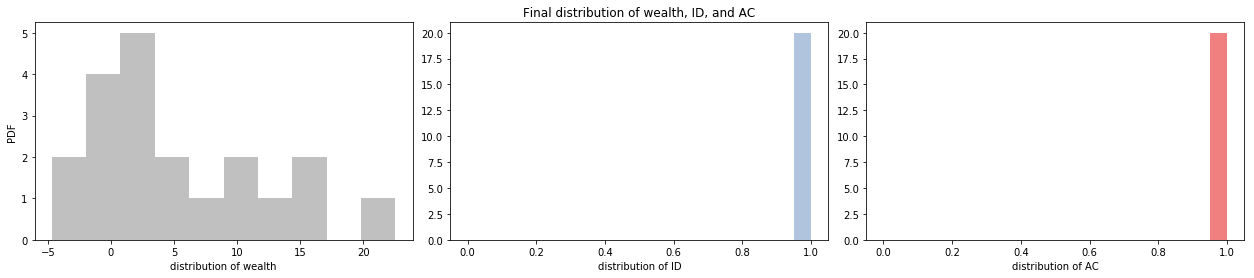

Final resource level: 84.77
Final average wealth: 5.27
Final mean identification: 0.99
Final mean affective commitment: 1.0
Sanctions per round per person: 2.1


In [4]:
directed_network = CPRSim(network = 'directed',markup=True)
directed_network.simulate(50)

Observations:
- The community in which agents observe an equal amount of others who do not observe them back successfully maintains cooperation at the same high level as the complete network.
- Social norms converge in a range around $p(c) \in [0.1,0.2]$ with the notable exception of some outliers who do not cooperate at all. The rest of the community is almost perfectly aligned in their norms, with some variance for extraction allowed in the distributions.
- Most importantly, wealth increases for almost all agents and the average value is significantly higher than for the other network structures, even while the resource is maintained at similarly high values. Sanctions per round are by far the lowest compared to the other two configurations.
- Identification and affective commitment both rise to 1, meaning that the social value that agents derive from the community in this network is also higher than in the other network structures.

In [35]:
wealth_directed = []
resource_directed = []
ident_directed = []
aff_comm_directed = []

for _ in range(30):
    directed_test = CPRSim(network='directed')
    directed_test.simulate(20)
    wealth_directed.append(directed_test.wealth[-1])
    resource_directed.append(directed_test.resource_over_time[-1]) 
    ident_directed.append(directed_test.id_over_time[-1])
    aff_comm_directed.append(directed_test.ac_over_time[-1])

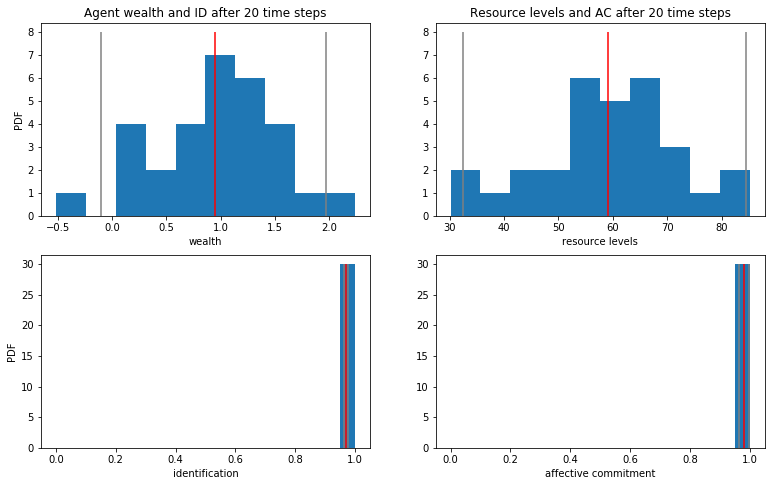

Esimates for means after 20 time-steps in a complete network
Wealth: 0.95
CI:[ -0.1 , 1.97 ]
Resource level: 59.08
CI:[ 32.36 , 84.59 ]
Identification: 0.97
CI:[ 0.96 , 0.98 ]
Affective commitment: 0.98
CI:[ 0.96 , 1.0 ]


In [37]:
_max_ = 8
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].hist(wealth_directed)
axs[0,0].set(title='Agent wealth and ID after 20 time steps',xlabel='wealth',ylabel='PDF')
axs[0,0].vlines(np.percentile(wealth_directed,2.5),0,_max_,color='grey')
axs[0,0].vlines(np.mean(wealth_directed),0,_max_,color='red')
axs[0,0].vlines(np.percentile(wealth_directed,97.5),0,_max_,color='grey')

axs[0,1].hist(resource_directed)
axs[0,1].set(title='Resource levels and AC after 20 time steps',xlabel='resource levels')
axs[0,1].vlines(np.percentile(resource_directed,2.5),0,_max_,color='grey')
axs[0,1].vlines(np.mean(resource_directed),0,_max_,color='red')
axs[0,1].vlines(np.percentile(resource_directed,97.5),0,_max_,color='grey')

axs[1,0].hist(ident_directed,bins=20,range=(0,1))
axs[1,0].set(xlabel='identification',ylabel='PDF')
axs[1,0].vlines(np.percentile(ident_directed,2.5),0,30,color='grey')
axs[1,0].vlines(np.mean(ident_directed),0,30,color='red')
axs[1,0].vlines(np.percentile(ident_directed,97.5),0,30,color='grey')

axs[1,1].hist(aff_comm_directed,bins=20,range=(0,1))
axs[1,1].set(xlabel='affective commitment')
axs[1,1].vlines(np.percentile(aff_comm_directed,2.5),0,30,color='grey')
axs[1,1].vlines(np.mean(aff_comm_directed),0,30,color='red')
axs[1,1].vlines(np.percentile(aff_comm_directed,97.5),0,30,color='grey')
plt.show()

print("Esimates for means after 20 time-steps in a complete network")
print("Wealth:",round(np.mean(wealth_directed),2))
print('CI:[',round(np.percentile(wealth_directed,2.5),2),",",round(np.percentile(wealth_directed,97.5),2),']')
print("Resource level:",round(np.mean(resource_directed),2))
print('CI:[',round(np.percentile(resource_directed,2.5),2),",",round(np.percentile(resource_directed,97.5),2),']')
print("Identification:",round(np.mean(ident_directed),2))
print('CI:[',round(np.percentile(ident_directed,2.5),2),",",round(np.percentile(ident_directed,97.5),2),']')
print("Affective commitment:",round(np.mean(aff_comm_directed),2))
print('CI:[',round(np.percentile(aff_comm_directed,2.5),2),",",round(np.percentile(aff_comm_directed,97.5),2),']')

Observations:
- Social norms do not coverge strongly, the distributions of expected norms range between 0 and 0.5. 
- The resource stock rises above the levels of the BA network, but does not quite reach those of the complete network. 
- However, wealth is at the high levels of the BA network. 
- Furthermore, both identification and affective commitment rise slightly, despite agents using the fewest number of sanctions of all three networks. 

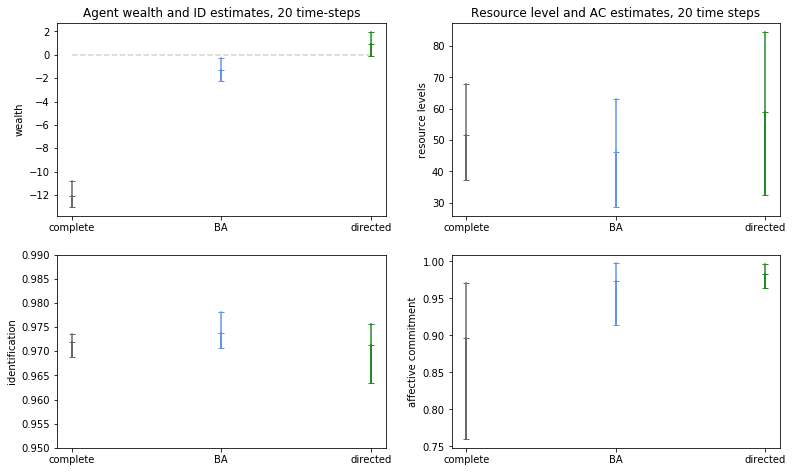

In [49]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].plot(np.full(3,'complete'),[np.mean(wealth_complete),np.percentile(wealth_complete,2.5),np.percentile(wealth_complete,97.5)],marker='_',color='dimgrey')
axs[0,0].plot(np.full(3,'BA'),[np.mean(wealth_BA),np.percentile(wealth_BA,2.5),np.percentile(wealth_BA,97.5)],marker='_',color='cornflowerblue')
axs[0,0].plot(np.full(3,'directed'),[np.mean(wealth_directed),np.percentile(wealth_directed,2.5),np.percentile(wealth_directed,97.5)],marker='_',color='forestgreen')
axs[0,0].hlines(0,0,2,color='lightgrey',linestyles='dashed')
axs[0,0].set(title='Agent wealth and ID estimates, 20 time-steps',ylabel='wealth')

axs[0,1].plot(np.full(3,'complete'),[np.mean(resource_complete),np.percentile(resource_complete,2.5),np.percentile(resource_complete,97.5)],marker='_',color='dimgrey')
axs[0,1].plot(np.full(3,'BA'),[np.mean(resource_BA),np.percentile(resource_BA,2.5),np.percentile(resource_BA,97.5)],marker='_',color='cornflowerblue')
axs[0,1].plot(np.full(3,'directed'),[np.mean(resource_directed),np.percentile(resource_directed,2.5),np.percentile(resource_directed,97.5)],marker='_',color='forestgreen')
axs[0,1].set(title='Resource level and AC estimates, 20 time steps',ylabel='resource levels')

axs[1,0].plot(np.full(3,'complete'),[np.mean(ident_complete),np.percentile(ident_complete,2.5),np.percentile(ident_complete,97.5)],marker='_',color='dimgrey')
axs[1,0].plot(np.full(3,'BA'),[np.mean(ident_BA),np.percentile(ident_BA,2.5),np.percentile(ident_BA,97.5)],marker='_',color='cornflowerblue')
axs[1,0].plot(np.full(3,'directed'),[np.mean(ident_directed),np.percentile(ident_directed,2.5),np.percentile(ident_directed,97.5)],marker='_',color='forestgreen')
axs[1,0].set(ylabel='identification',ylim=[0.95,0.99])

axs[1,1].plot(np.full(3,'complete'),[np.mean(aff_comm_complete),np.percentile(aff_comm_complete,2.5),np.percentile(aff_comm_complete,97.5)],marker='_',color='dimgrey')
axs[1,1].plot(np.full(3,'BA'),[np.mean(aff_comm_BA),np.percentile(aff_comm_BA,2.5),np.percentile(aff_comm_BA,97.5)],marker='_',color='cornflowerblue')
axs[1,1].plot(np.full(3,'directed'),[np.mean(aff_comm_directed),np.percentile(aff_comm_directed,2.5),np.percentile(aff_comm_directed,97.5)],marker='_',color='forestgreen')
axs[1,1].set(ylabel='affective commitment')

plt.show()

**Summary Hypothesis 1: Directed, incomplete networks best support cooperation**

We can, for now, confirm the hypothesis that directed, incomplete networks can maintain high cooperation, while preserving individual wealth, and leading to rising identification with and affective commitment towards the group at balanced levels which combine the best outcomes of the other two networks.

### Testing Hypothesis 2: The effect of initial identification on cooperation

I compare how cooperation in directed, incomplete networks changes as a result of higher or lower initial values of identification amongst the group. The literature predicts that homogeneously high identification with the group should sustain higher cooperation while also maintaining wealth levels than lower or more heterogeneous identification levels, because agents tend to choose to cooperate with others who are of the same group.

For a first test, we compare the levels of the resource, wealth, identification (ID) and affective commitment (AC) after 10 time steps, in response to three different identification levels: 0.1, 0.5, and 0.9.

In [50]:
IDs = np.linspace(0.1,0.9,3)
wealth_id = []
resource_id = []
ident_id = []
aff_comm_id = []
id_vars = []

for i in IDs:
    W = []
    R = []
    I = []
    A = []
    for _ in range(30):
        id_test = CPRSim(network='directed',ID = i)
        id_test.simulate(20)
        W.append(id_test.wealth[-1])
        R.append(id_test.resource_over_time[-1]) 
        I.append(id_test.id_over_time[-1])
        A.append(id_test.ac_over_time[-1])
    wealth_id.append([np.mean(W),np.percentile(W,2.5),np.percentile(W,97.5)])
    resource_id.append([np.mean(R),np.percentile(R,2.5),np.percentile(R,97.5)])
    ident_id.append([np.mean(I),np.percentile(I,2.5),np.percentile(I,97.5)])
    aff_comm_id.append([np.mean(A),np.percentile(A,2.5),np.percentile(A,97.5)])
    id_vars.extend([i]*3)

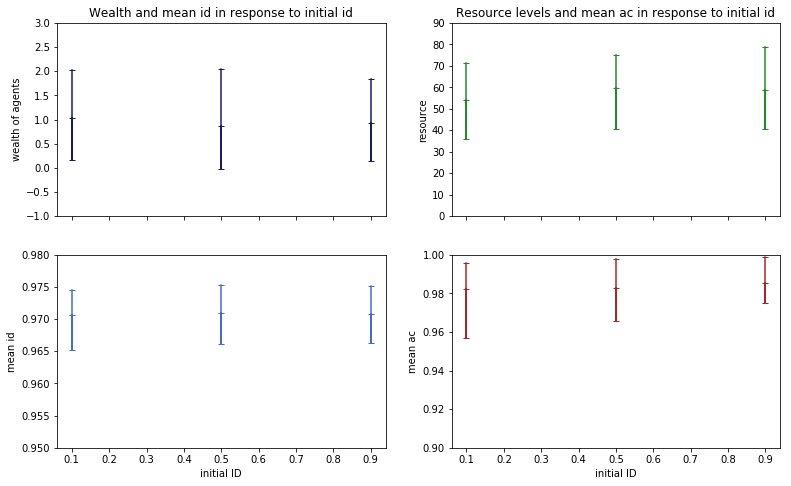

In [69]:
fig, axs = plt.subplots(2, 2, sharex=True)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].plot(id_vars[0:3], wealth_id[0],marker = '_',color='midnightblue')
axs[0,0].plot(id_vars[3:6], wealth_id[1],marker = '_',color='midnightblue')
axs[0,0].plot(id_vars[6:], wealth_id[2],marker = '_',color='midnightblue')
axs[0,0].set(ylim = (-1,3),title = 'Wealth and mean id in response to initial id',ylabel ='wealth of agents')

axs[0,1].plot(id_vars[0:3], resource_id[0],marker = '_',color='forestgreen')
axs[0,1].plot(id_vars[3:6], resource_id[1],marker = '_',color='forestgreen')
axs[0,1].plot(id_vars[6:], resource_id[2],marker = '_',color='forestgreen')
axs[0,1].set(ylabel ='resource',title = 'Resource levels and mean ac in response to initial id',ylim=(0,90))

axs[1,0].plot(id_vars[0:3], ident_id[0],marker = '_',color='royalblue')
axs[1,0].plot(id_vars[3:6], ident_id[1],marker = '_',color='royalblue')
axs[1,0].plot(id_vars[6:], ident_id[2],marker = '_',color='royalblue')
axs[1,0].set(ylabel='mean id',xlabel='initial ID',ylim=(0.95,.98))

axs[1,1].plot(id_vars[0:3], aff_comm_id[0],marker = '_',color='firebrick')
axs[1,1].plot(id_vars[3:6], aff_comm_id[1],marker = '_',color='firebrick')
axs[1,1].plot(id_vars[6:], aff_comm_id[2],marker = '_',color='firebrick')
axs[1,1].set(ylabel ='mean ac', xlabel='initial ID',ylim=(.9,1))

plt.show()

**Summary Hypothesis 2: Initial identification has no effect cooperation**

There are no significant differences in outcomes between networks with low, medium and high initial identification with the group. 

### Testing Hypothesis 3: Reputation v identity mechanism



**1. The reputation mechanism**



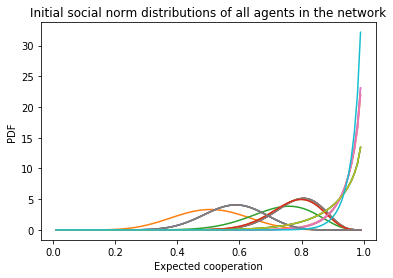

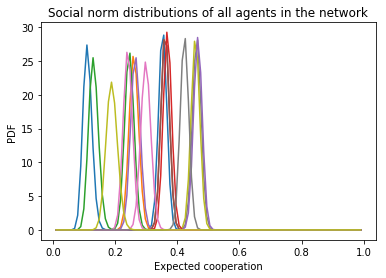

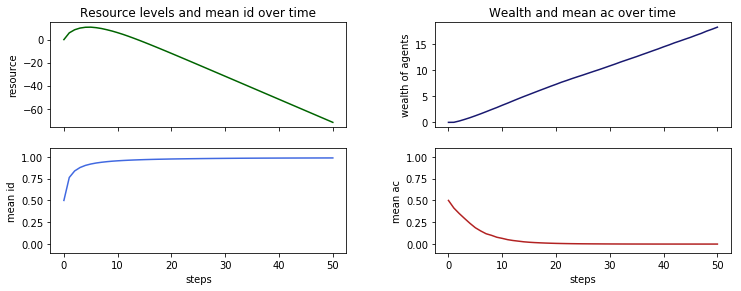

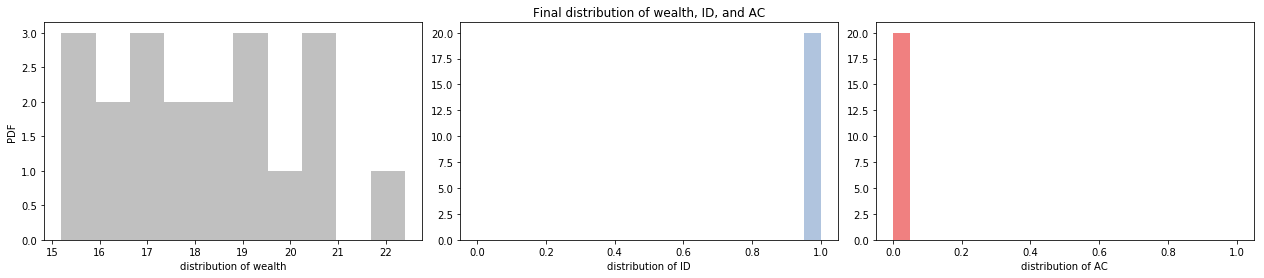

Final resource level: -71.84
Final average wealth: 18.16
Final mean identification: 0.99
Final mean affective commitment: 0.0
Sanctions per round per person: 1.09


In [71]:
reputation_mechanism = CPRSim(mechanism='reputation',markup=True)
reputation_mechanism.simulate(50)

Observations:
- Just the reputation mechanism does not maintain the resource, it plummets rapidly.
- Social norms do not converge, but rather vary strongly between agents, although they individually have high confidence in their norms.
- Wealth rises significantly for all agents and they impose only about 1 sanction per round.
- Identification with the group rises to 1 as all agents extract strongly from the resource.
- Affective commitment towards group goals falls to 0.

In [74]:
wealth_reputation = []
resource_reputation = []
ident_reputation = []
aff_comm_reputation = []

for _ in range(30):
    reputation_test = CPRSim(mechanism='reputation')
    reputation_test.simulate(20)
    wealth_reputation.append(reputation_test.wealth[-1])
    resource_reputation.append(reputation_test.resource_over_time[-1]) 
    ident_reputation.append(reputation_test.id_over_time[-1])
    aff_comm_reputation.append(reputation_test.ac_over_time[-1])

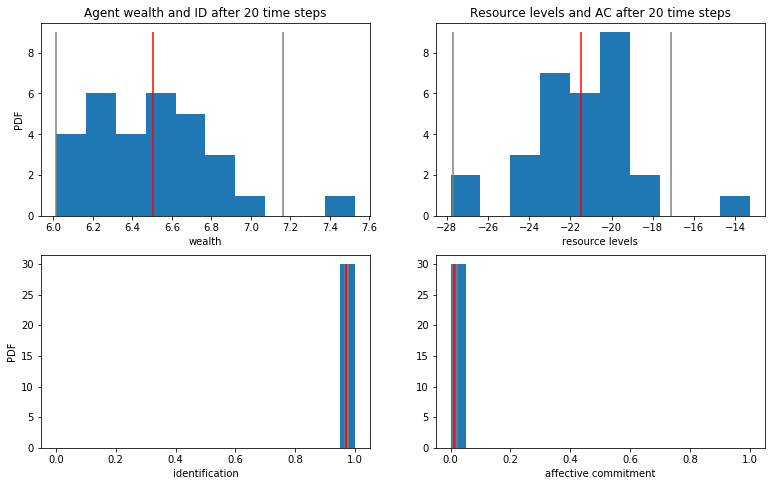

Esimates for means after 20 time-steps in a complete network
Wealth: 6.51
CI:[ 6.01 , 7.16 ]
Resource level: -21.47
CI:[ -27.71 , -17.13 ]
Identification: 0.97
CI:[ 0.97 , 0.98 ]
Affective commitment: 0.01
CI:[ 0.01 , 0.02 ]


In [78]:
_max_ = 9
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].hist(wealth_reputation)
axs[0,0].set(title='Agent wealth and ID after 20 time steps',xlabel='wealth',ylabel='PDF')
axs[0,0].vlines(np.percentile(wealth_reputation,2.5),0,_max_,color='grey')
axs[0,0].vlines(np.mean(wealth_reputation),0,_max_,color='red')
axs[0,0].vlines(np.percentile(wealth_reputation,97.5),0,_max_,color='grey')

axs[0,1].hist(resource_reputation)
axs[0,1].set(title='Resource levels and AC after 20 time steps',xlabel='resource levels')
axs[0,1].vlines(np.percentile(resource_reputation,2.5),0,_max_,color='grey')
axs[0,1].vlines(np.mean(resource_reputation),0,_max_,color='red')
axs[0,1].vlines(np.percentile(resource_reputation,97.5),0,_max_,color='grey')

axs[1,0].hist(ident_reputation,bins=20,range=(0,1))
axs[1,0].set(xlabel='identification',ylabel='PDF')
axs[1,0].vlines(np.percentile(ident_reputation,2.5),0,30,color='grey')
axs[1,0].vlines(np.mean(ident_reputation),0,30,color='red')
axs[1,0].vlines(np.percentile(ident_reputation,97.5),0,30,color='grey')

axs[1,1].hist(aff_comm_reputation,bins=20,range=(0,1))
axs[1,1].set(xlabel='affective commitment')
axs[1,1].vlines(np.percentile(aff_comm_reputation,2.5),0,30,color='grey')
axs[1,1].vlines(np.mean(aff_comm_reputation),0,30,color='red')
axs[1,1].vlines(np.percentile(aff_comm_reputation,97.5),0,30,color='grey')
plt.show()

print("Esimates for means after 20 time-steps in a complete network")
print("Wealth:",round(np.mean(wealth_reputation),2))
print('CI:[',round(np.percentile(wealth_reputation,2.5),2),",",round(np.percentile(wealth_reputation,97.5),2),']')
print("Resource level:",round(np.mean(resource_reputation),2))
print('CI:[',round(np.percentile(resource_reputation,2.5),2),",",round(np.percentile(resource_reputation,97.5),2),']')
print("Identification:",round(np.mean(ident_reputation),2))
print('CI:[',round(np.percentile(ident_reputation,2.5),2),",",round(np.percentile(ident_reputation,97.5),2),']')
print("Affective commitment:",round(np.mean(aff_comm_reputation),2))
print('CI:[',round(np.percentile(aff_comm_reputation,2.5),2),",",round(np.percentile(aff_comm_reputation,97.5),2),']')

**2. The identity mechanism**

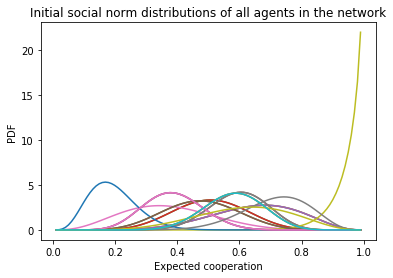

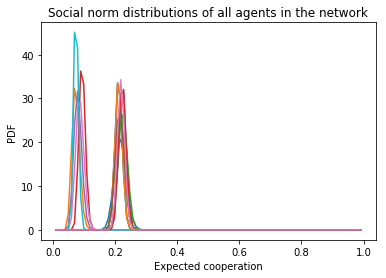

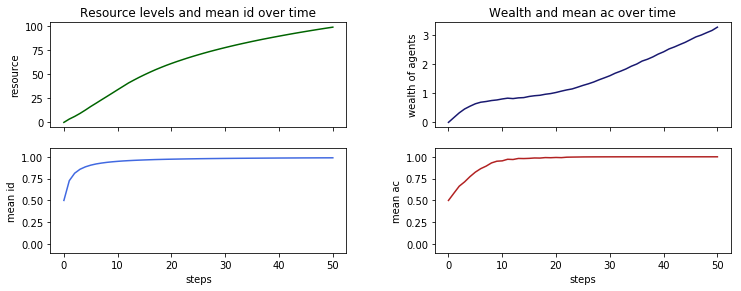

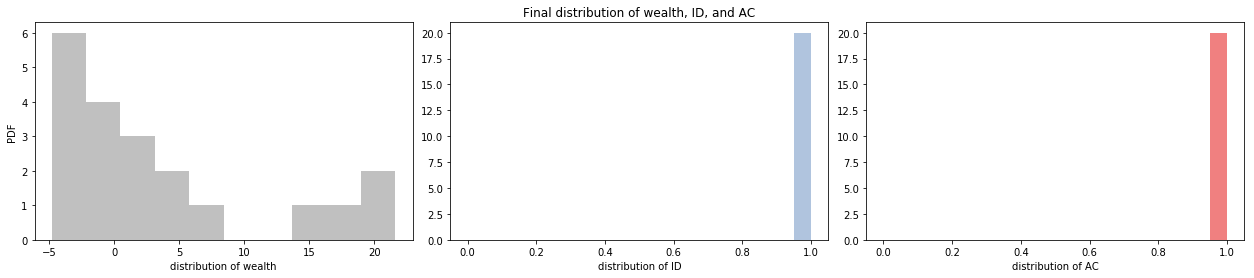

Final resource level: 98.79
Final average wealth: 3.28
Final mean identification: 0.99
Final mean affective commitment: 1.0
Sanctions per round per person: 2.36


In [72]:
identity_mechanism = CPRSim(mechanism='identity',markup=True)
identity_mechanism.simulate(50)

Observations:
- The resource rises significantly.
- Social norms converge to two sets of means, one group around $p(c) = 0.1$, another group around $p(c)=0.2$.
- Most agents accumulate wealth, and average wealth rises. Sanctions per round are more than double compared to the reputation mechanism.
- Identification rises to 1.
- Affective commitment towards group goals rises to 1.

In [83]:
wealth_identity = []
resource_identity = []
ident_identity = []
aff_comm_identity = []

for _ in range(30):
    identity_test = CPRSim(mechanism='identity')
    identity_test.simulate(20)
    wealth_identity.append(identity_test.wealth[-1])
    resource_identity.append(identity_test.resource_over_time[-1]) 
    ident_identity.append(identity_test.id_over_time[-1])
    aff_comm_identity.append(identity_test.ac_over_time[-1])

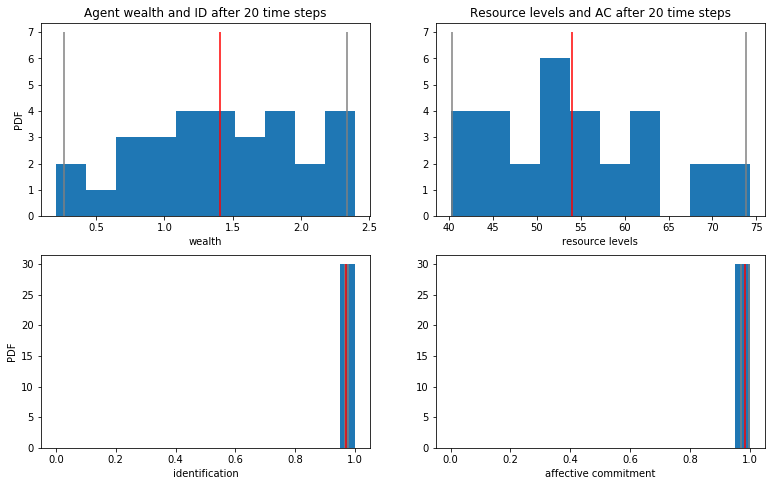

Esimates for means after 20 time-steps in a complete network
Wealth: 1.41
CI:[ 0.26 , 2.34 ]
Resource level: 54.02
CI:[ 40.33 , 73.87 ]
Identification: 0.97
CI:[ 0.97 , 0.98 ]
Affective commitment: 0.98
CI:[ 0.97 , 1.0 ]


In [84]:
_max_ = 7
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].hist(wealth_identity)
axs[0,0].set(title='Agent wealth and ID after 20 time steps',xlabel='wealth',ylabel='PDF')
axs[0,0].vlines(np.percentile(wealth_identity,2.5),0,_max_,color='grey')
axs[0,0].vlines(np.mean(wealth_identity),0,_max_,color='red')
axs[0,0].vlines(np.percentile(wealth_identity,97.5),0,_max_,color='grey')

axs[0,1].hist(resource_identity)
axs[0,1].set(title='Resource levels and AC after 20 time steps',xlabel='resource levels')
axs[0,1].vlines(np.percentile(resource_identity,2.5),0,_max_,color='grey')
axs[0,1].vlines(np.mean(resource_identity),0,_max_,color='red')
axs[0,1].vlines(np.percentile(resource_identity,97.5),0,_max_,color='grey')

axs[1,0].hist(ident_identity,bins=20,range=(0,1))
axs[1,0].set(xlabel='identification',ylabel='PDF')
axs[1,0].vlines(np.percentile(ident_identity,2.5),0,30,color='grey')
axs[1,0].vlines(np.mean(ident_identity),0,30,color='red')
axs[1,0].vlines(np.percentile(ident_identity,97.5),0,30,color='grey')

axs[1,1].hist(aff_comm_identity,bins=20,range=(0,1))
axs[1,1].set(xlabel='affective commitment')
axs[1,1].vlines(np.percentile(aff_comm_identity,2.5),0,30,color='grey')
axs[1,1].vlines(np.mean(aff_comm_identity),0,30,color='red')
axs[1,1].vlines(np.percentile(aff_comm_identity,97.5),0,30,color='grey')
plt.show()

print("Esimates for means after 20 time-steps in a complete network")
print("Wealth:",round(np.mean(wealth_identity),2))
print('CI:[',round(np.percentile(wealth_identity,2.5),2),",",round(np.percentile(wealth_identity,97.5),2),']')
print("Resource level:",round(np.mean(resource_identity),2))
print('CI:[',round(np.percentile(resource_identity,2.5),2),",",round(np.percentile(resource_identity,97.5),2),']')
print("Identification:",round(np.mean(ident_identity),2))
print('CI:[',round(np.percentile(ident_identity,2.5),2),",",round(np.percentile(ident_identity,97.5),2),']')
print("Affective commitment:",round(np.mean(aff_comm_identity),2))
print('CI:[',round(np.percentile(aff_comm_identity,2.5),2),",",round(np.percentile(aff_comm_identity,97.5),2),']')

**3. The combined mechanisms**

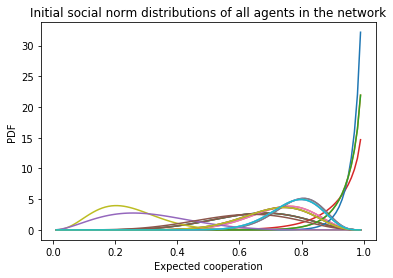

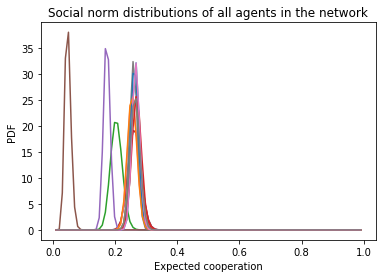

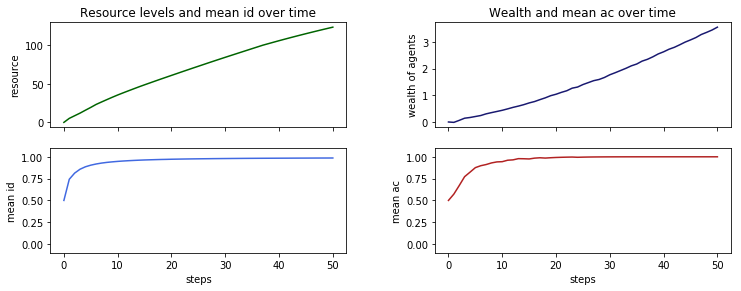

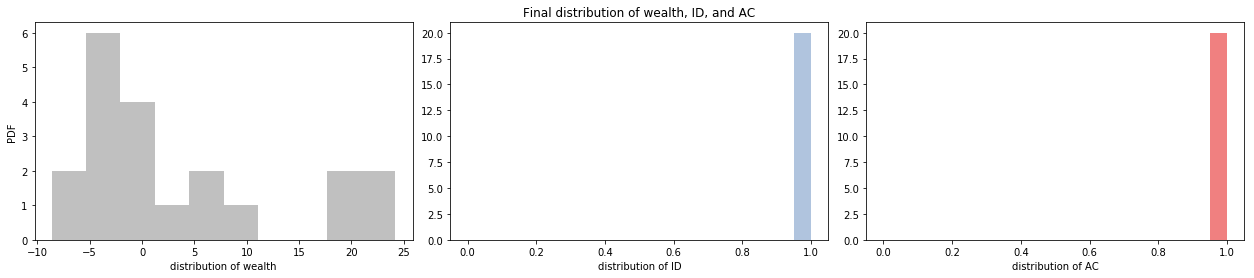

Final resource level: 123.26
Final average wealth: 3.55
Final mean identification: 0.99
Final mean affective commitment: 1.0
Sanctions per round per person: 2.06


In [73]:
combined_mechanisms = CPRSim(mechanism='',markup=True)
combined_mechanisms.simulate(50)

In [85]:
wealth_combined = []
resource_combined = []
ident_combined = []
aff_comm_combined = []

for _ in range(30):
    combined_test = CPRSim(mechanism='')
    combined_test.simulate(20)
    wealth_combined.append(combined_test.wealth[-1])
    resource_combined.append(combined_test.resource_over_time[-1]) 
    ident_combined.append(combined_test.id_over_time[-1])
    aff_comm_combined.append(combined_test.ac_over_time[-1])

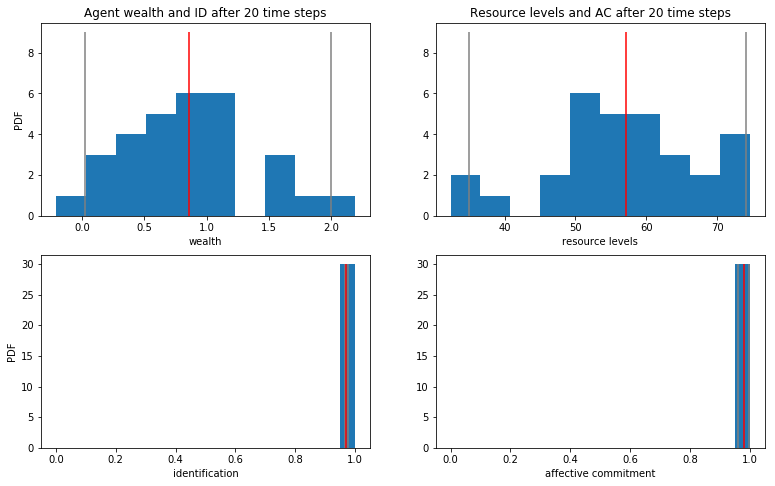

Esimates for means after 20 time-steps in a complete network
Wealth: 0.86
CI:[ 0.03 , 2.0 ]
Resource level: 57.16
CI:[ 35.02 , 74.1 ]
Identification: 0.97
CI:[ 0.97 , 0.98 ]
Affective commitment: 0.98
CI:[ 0.96 , 1.0 ]


In [86]:
_max_ = 9
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].hist(wealth_combined)
axs[0,0].set(title='Agent wealth and ID after 20 time steps',xlabel='wealth',ylabel='PDF')
axs[0,0].vlines(np.percentile(wealth_combined,2.5),0,_max_,color='grey')
axs[0,0].vlines(np.mean(wealth_combined),0,_max_,color='red')
axs[0,0].vlines(np.percentile(wealth_combined,97.5),0,_max_,color='grey')

axs[0,1].hist(resource_combined)
axs[0,1].set(title='Resource levels and AC after 20 time steps',xlabel='resource levels')
axs[0,1].vlines(np.percentile(resource_combined,2.5),0,_max_,color='grey')
axs[0,1].vlines(np.mean(resource_combined),0,_max_,color='red')
axs[0,1].vlines(np.percentile(resource_combined,97.5),0,_max_,color='grey')

axs[1,0].hist(ident_combined,bins=20,range=(0,1))
axs[1,0].set(xlabel='identification',ylabel='PDF')
axs[1,0].vlines(np.percentile(ident_combined,2.5),0,30,color='grey')
axs[1,0].vlines(np.mean(ident_combined),0,30,color='red')
axs[1,0].vlines(np.percentile(ident_combined,97.5),0,30,color='grey')

axs[1,1].hist(aff_comm_combined,bins=20,range=(0,1))
axs[1,1].set(xlabel='affective commitment')
axs[1,1].vlines(np.percentile(aff_comm_combined,2.5),0,30,color='grey')
axs[1,1].vlines(np.mean(aff_comm_combined),0,30,color='red')
axs[1,1].vlines(np.percentile(aff_comm_combined,97.5),0,30,color='grey')
plt.show()

print("Esimates for means after 20 time-steps in a complete network")
print("Wealth:",round(np.mean(wealth_combined),2))
print('CI:[',round(np.percentile(wealth_combined,2.5),2),",",round(np.percentile(wealth_combined,97.5),2),']')
print("Resource level:",round(np.mean(resource_combined),2))
print('CI:[',round(np.percentile(resource_combined,2.5),2),",",round(np.percentile(resource_combined,97.5),2),']')
print("Identification:",round(np.mean(ident_combined),2))
print('CI:[',round(np.percentile(ident_combined,2.5),2),",",round(np.percentile(ident_combined,97.5),2),']')
print("Affective commitment:",round(np.mean(aff_comm_combined),2))
print('CI:[',round(np.percentile(aff_comm_combined,2.5),2),",",round(np.percentile(aff_comm_combined,97.5),2),']')

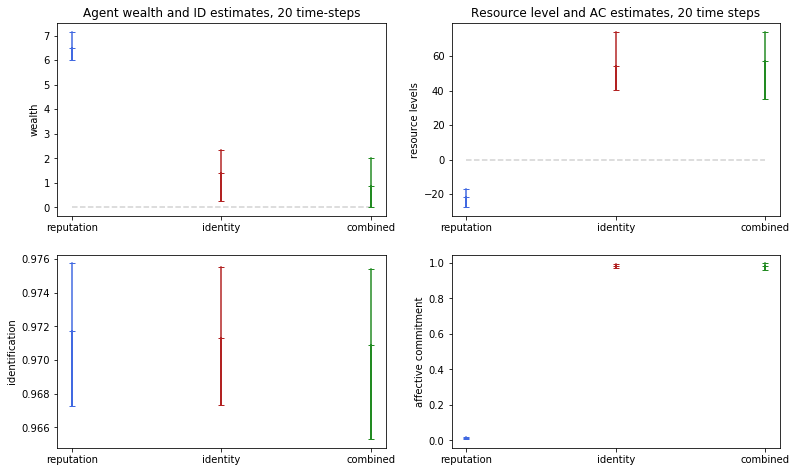

In [89]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].plot(np.full(3,'reputation'),[np.mean(wealth_reputation),np.percentile(wealth_reputation,2.5),np.percentile(wealth_reputation,97.5)],marker='_',color='royalblue')
axs[0,0].plot(np.full(3,'identity'),[np.mean(wealth_identity),np.percentile(wealth_identity,2.5),np.percentile(wealth_identity,97.5)],marker='_',color='firebrick')
axs[0,0].plot(np.full(3,'combined'),[np.mean(wealth_combined),np.percentile(wealth_combined,2.5),np.percentile(wealth_combined,97.5)],marker='_',color='forestgreen')
axs[0,0].set(title='Agent wealth and ID estimates, 20 time-steps',ylabel='wealth')
axs[0,0].hlines(0,0,2,color='lightgrey',linestyles='dashed')

axs[0,1].plot(np.full(3,'reputation'),[np.mean(resource_reputation),np.percentile(resource_reputation,2.5),np.percentile(resource_reputation,97.5)],marker='_',color='royalblue')
axs[0,1].plot(np.full(3,'identity'),[np.mean(resource_identity),np.percentile(resource_identity,2.5),np.percentile(resource_identity,97.5)],marker='_',color='firebrick')
axs[0,1].plot(np.full(3,'combined'),[np.mean(resource_combined),np.percentile(resource_combined,2.5),np.percentile(resource_combined,97.5)],marker='_',color='forestgreen')
axs[0,1].hlines(0,0,2,color='lightgrey',linestyles='dashed')
axs[0,1].set(title='Resource level and AC estimates, 20 time steps',ylabel='resource levels')

axs[1,0].plot(np.full(3,'reputation'),[np.mean(ident_reputation),np.percentile(ident_reputation,2.5),np.percentile(ident_reputation,97.5)],marker='_',color='royalblue')
axs[1,0].plot(np.full(3,'identity'),[np.mean(ident_identity),np.percentile(ident_identity,2.5),np.percentile(ident_identity,97.5)],marker='_',color='firebrick')
axs[1,0].plot(np.full(3,'combined'),[np.mean(ident_combined),np.percentile(ident_combined,2.5),np.percentile(ident_combined,97.5)],marker='_',color='forestgreen')
axs[1,0].set(ylabel='identification')

axs[1,1].plot(np.full(3,'reputation'),[np.mean(aff_comm_reputation),np.percentile(aff_comm_reputation,2.5),np.percentile(aff_comm_reputation,97.5)],marker='_',color='royalblue')
axs[1,1].plot(np.full(3,'identity'),[np.mean(aff_comm_identity),np.percentile(aff_comm_identity,2.5),np.percentile(aff_comm_identity,97.5)],marker='_',color='firebrick')
axs[1,1].plot(np.full(3,'combined'),[np.mean(aff_comm_combined),np.percentile(aff_comm_combined,2.5),np.percentile(aff_comm_combined,97.5)],marker='_',color='forestgreen')
axs[1,1].set(ylabel='affective commitment')

plt.show()

### Testing Hypothesis 4: The movement in phase space

We have now confirmed that directed, incomplete networks best support cooperation, that the initial identification levels do not affect cooperation in this model, and that the identity mechanism better support cooperation than reputation. That means our model supports one key prediction from the literature, rejects another, and makes a novel prediction for future experimental work.

These findings mean that ideal conditions for cooperation within this model is the combination of reputation and identity mechanisms in an incomplete, directed network. Let's take a look at how the relationships between the four key macro-level variables that we have used as output so far look like within this configuration.

Resource levels and agent wealth are competing parameters with a negative correlation: if agents use the resource more, its level will go down but wealth will increase, while lower use of the resource is more sustainable but leads to lower wealth levels. The optimization between these two is a key goal of any resource-using community.

The introduction of social utility in the form of identification and affective commitment supports a stronger weighting of the sustainability of the resource since cooperation to preserve it also favors higher identification with the group and affective commitment towards its goal, two variables that encode how connected community members are to each other.

The literature predicts that in a functioning common-pool resource governance scheme, the agents influence each other so that identification and affective commitment rise over time as the system moves from an 'exploitation' phase of high resource use and wealth accumulation to a 'conservation' phase of higher identification, affective commitment and resource levels, while wealth levels stabilize (Mosimane et al., 2012).

To test whether the model follows this hypothesis, we can look at the development of the model over an extended period of time, starting with low identification and low affective commitment.

In [110]:
wealth_dist_ps = []
resource_ps = []
ident_ps = []
aff_comm_ps = []

for _ in range(30):
    ps_test = CPRSim(network='directed',ID = .2,AC=.2)
    ps_test.simulate(20)
    wealth_dist_ps.append(ps_test.accounts)
    resource_ps.append(ps_test.resource_over_time[-1]) 
    ident_ps.append(ps_test.identification)
    aff_comm_ps.append(ps_test.affective_commitment)

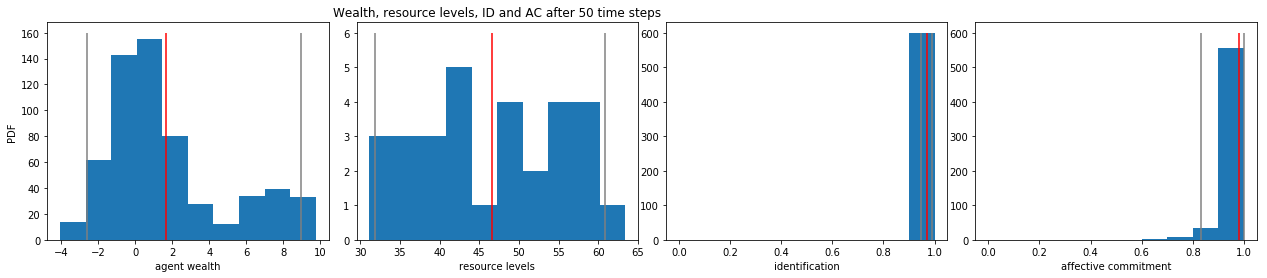

In [112]:
_max_ = 600
fig, axs = plt.subplots(1, 4)
plt.subplots_adjust(left=.2,right=3, wspace=.1)

axs[0].hist(np.ravel(wealth_dist_ps))
axs[0].set(xlabel='agent wealth',ylabel='PDF')
axs[0].vlines(np.percentile(wealth_dist_ps,2.5),0,160,color='grey')
axs[0].vlines(np.mean(wealth_dist_ps),0,160,color='red')
axs[0].vlines(np.percentile(wealth_dist_ps,97.5),0,160,color='grey')

axs[1].hist(resource_ps)
axs[1].set(title='Wealth, resource levels, ID and AC after 50 time steps',xlabel='resource levels')
axs[1].vlines(np.percentile(resource_ps,2.5),0,6,color='grey')
axs[1].vlines(np.mean(resource_ps),0,6,color='red')
axs[1].vlines(np.percentile(resource_ps,97.5),0,6,color='grey')

axs[2].hist(np.ravel(ident_ps),range=(0,1))
axs[2].set(xlabel='identification')
axs[2].vlines(np.percentile(ident_ps,2.5),0,_max_,color='grey')
axs[2].vlines(np.mean(ident_ps),0,_max_,color='red')
axs[2].vlines(np.percentile(ident_ps,97.5),0,_max_,color='grey')

axs[3].hist(np.ravel(aff_comm_ps),range=(0,1))
axs[3].set(xlabel='affective commitment')
axs[3].vlines(np.percentile(aff_comm_ps,2.5),0,_max_,color='grey')
axs[3].vlines(np.mean(aff_comm_ps),0,_max_,color='red')
axs[3].vlines(np.percentile(aff_comm_ps,97.5),0,_max_,color='grey')
plt.show()

**Summary Hypothesis 4: No movement towards a conservation phase**

Starting at low levels of identification and affective commitment, the system does not move towards conservation of the resource. Rather, average agent wealth increases significantly, while the resource barely stays stable, identification with the group stays around the initial levels, and affective commitment towards group goals disappears. At low levels of these two initial values, the system is therefore stuck in an attraction basin of non-cooperation and exploitation of the resource. 

The preliminary conclusion is that identity alone, through the updating of social norms, cannot sustain cooperation. Other variables in the model, including the cost of sanctioning that motivates cooperation after defection, and the size of neighborhoods and therefore the number of observed others, can alter this result, which future investigation will reveal.

Furthermore, it will be interesting to see whether the introduction of the reputation mechanism can alter this outcome.

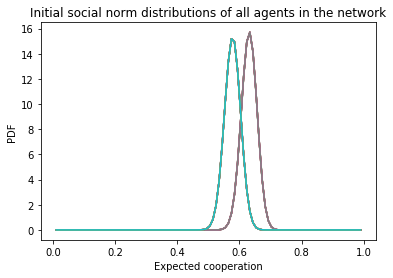

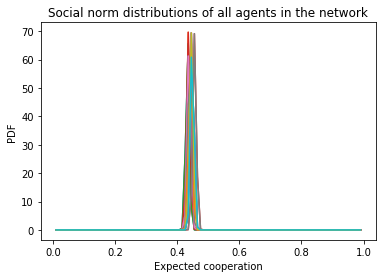

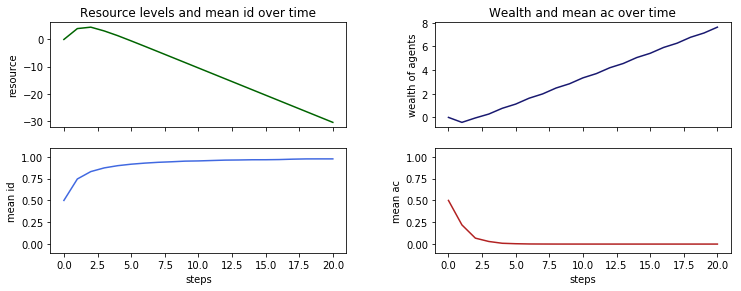

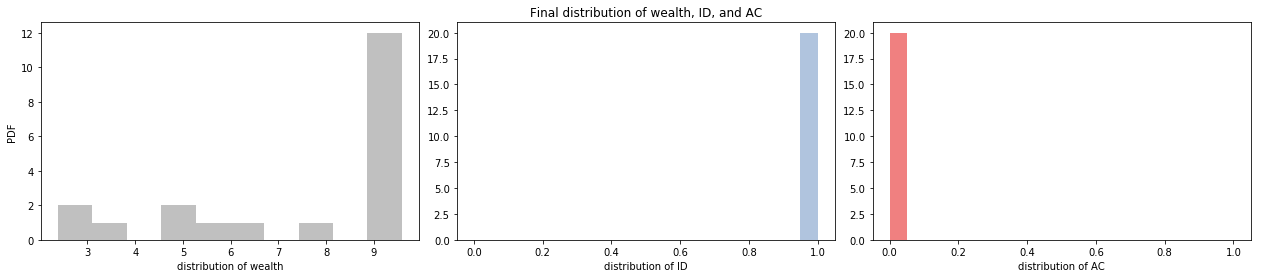

Final resource level: -30.47
Final average wealth: 7.63
Final mean identification: 0.98
Final mean affective commitment: 0.0
Sanctions per round per person: 0.95


In [114]:
reputation_complete = CPRSim(network='complete',mechanism='reputation',markup=True)
reputation_complete.simulate(20)

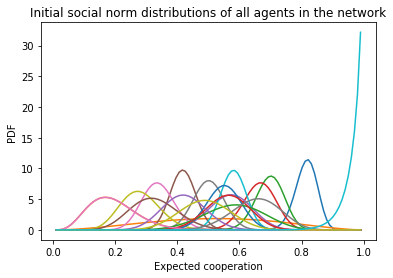

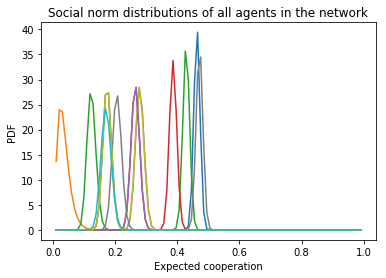

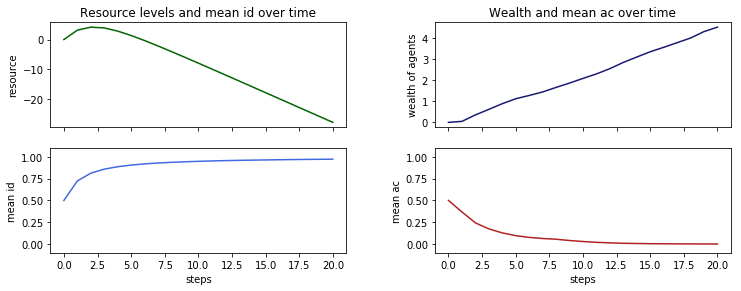

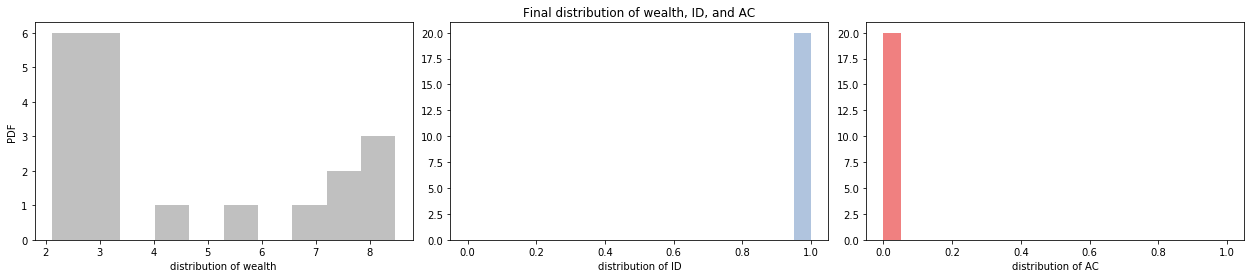

Final resource level: -27.86
Final average wealth: 4.5
Final mean identification: 0.97
Final mean affective commitment: 0.0
Sanctions per round per person: 2.44


In [126]:
reputation_BA = CPRSim(network='BA',mechanism='reputation',markup=True)
reputation_BA.simulate(20)

### Testing Hypothesis 5: Communication

The literature crucially predicts that in larger communities, communication can help uphold cooperation. The initial finding that a complete network sustains cooperation but leads to excessive sanctioning and lower wealth levels may indicate that communication can be detrimental when motivating sanctions. 

In [117]:
neighborhoods = np.linspace(1,16,6,dtype='int')
wealth_upper = []
wealth_mean = []
wealth_lower = []
resource_upper = []
resource_mean = []
resource_lower = []
ident_upper = []
ident_mean = []
ident_lower = []
aff_comm_upper = []
aff_comm_mean = []
aff_comm_lower = []

for n in neighborhoods:
    W = []
    R = []
    I = []
    A = []
    for _ in range(10):
        neighborhood_test = CPRSim(neighborhood_size=n)
        neighborhood_test.simulate(20)
        W.append(neighborhood_test.wealth[-1])
        R.append(neighborhood_test.resource_over_time[-1]) 
        I.append(neighborhood_test.id_over_time[-1])
        A.append(neighborhood_test.ac_over_time[-1])
    wealth_upper.append(np.percentile(W,97.5))
    wealth_mean.append(np.mean(W))
    wealth_lower.append(np.percentile(W,2.5))
    resource_upper.append(np.percentile(R,97.5))
    resource_mean.append(np.mean(R))
    resource_lower.append(np.percentile(R,2.5))
    ident_upper.append(np.percentile(I,97.5))
    ident_mean.append(np.mean(I))
    ident_lower.append(np.percentile(I,2.5))    
    aff_comm_upper.append(np.percentile(A,97.5))
    aff_comm_mean.append(np.mean(A))
    aff_comm_lower.append(np.percentile(A,2.5))

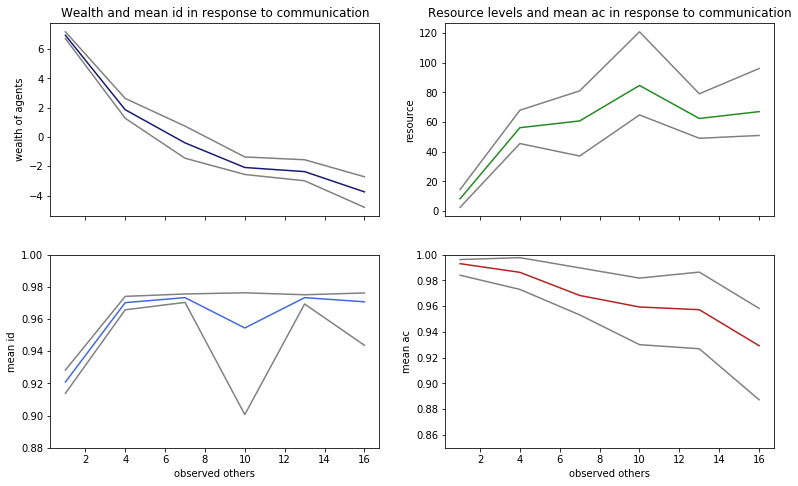

In [125]:
fig, axs = plt.subplots(2, 2, sharex=True)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].plot(neighborhoods, wealth_upper,color='grey')
axs[0,0].plot(neighborhoods, wealth_mean,color='midnightblue')
axs[0,0].plot(neighborhoods, wealth_lower,color='grey')
axs[0,0].set(title = 'Wealth and mean id in response to communication',ylabel ='wealth of agents')

axs[0,1].plot(neighborhoods, resource_upper,color='grey')
axs[0,1].plot(neighborhoods, resource_mean,color='forestgreen')
axs[0,1].plot(neighborhoods, resource_lower,color='grey')
axs[0,1].set(ylabel ='resource',title = 'Resource levels and mean ac in response to communication')

axs[1,0].plot(neighborhoods, ident_upper,color='grey')
axs[1,0].plot(neighborhoods, ident_mean,color='royalblue')
axs[1,0].plot(neighborhoods, ident_lower,color='grey')
axs[1,0].set(ylabel='mean id',xlabel='observed others',ylim=(.88,1))

axs[1,1].plot(neighborhoods, aff_comm_upper,color='grey')
axs[1,1].plot(neighborhoods, aff_comm_mean,color='firebrick')
axs[1,1].plot(neighborhoods, aff_comm_lower,color='grey')
axs[1,1].set(ylabel ='mean ac', xlabel='observed others',ylim=(.85,1))

plt.show()

## Post-testing

Changes from network size

In [127]:
sizes = np.linspace(20,100,3,dtype='int')
wealth_upper_size = []
wealth_mean_size = []
wealth_lower_size = []
resource_upper_size = []
resource_mean_size = []
resource_lower_size = []
ident_upper_size = []
ident_mean_size = []
ident_lower_size = []
aff_comm_upper_size = []
aff_comm_mean_size = []
aff_comm_lower_size = []

for s in sizes:
    W = []
    R = []
    I = []
    A = []
    for _ in range(20):
        neighborhood_test = CPRSim(network_size=s)
        neighborhood_test.simulate(20)
        W.append(neighborhood_test.wealth[-1])
        R.append(neighborhood_test.resource_over_time[-1]) 
        I.append(neighborhood_test.id_over_time[-1])
        A.append(neighborhood_test.ac_over_time[-1])
    wealth_upper_size.append(np.percentile(W,97.5))
    wealth_mean_size.append(np.mean(W))
    wealth_lower_size.append(np.percentile(W,2.5))
    resource_upper_size.append(np.percentile(R,97.5))
    resource_mean_size.append(np.mean(R))
    resource_lower_size.append(np.percentile(R,2.5))
    ident_upper_size.append(np.percentile(I,97.5))
    ident_mean_size.append(np.mean(I))
    ident_lower_size.append(np.percentile(I,2.5))    
    aff_comm_upper_size.append(np.percentile(A,97.5))
    aff_comm_mean_size.append(np.mean(A))
    aff_comm_lower_size.append(np.percentile(A,2.5))

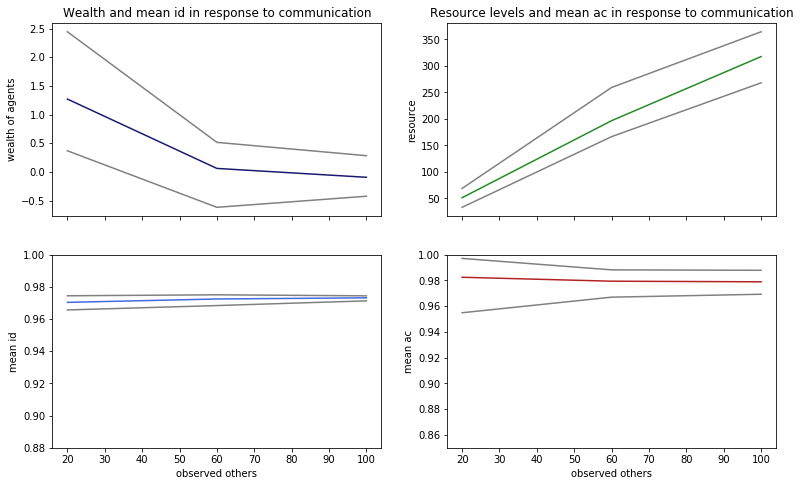

In [128]:
fig, axs = plt.subplots(2, 2, sharex=True)
plt.subplots_adjust(top=1.6,right=1.8, hspace=.2,wspace=.2)

axs[0,0].plot(sizes, wealth_upper_size,color='grey')
axs[0,0].plot(sizes, wealth_mean_size,color='midnightblue')
axs[0,0].plot(sizes, wealth_lower_size,color='grey')
axs[0,0].set(title = 'Wealth and mean id in response to communication',ylabel ='wealth of agents')

axs[0,1].plot(sizes, resource_upper_size,color='grey')
axs[0,1].plot(sizes, resource_mean_size,color='forestgreen')
axs[0,1].plot(sizes, resource_lower_size,color='grey')
axs[0,1].set(ylabel ='resource',title = 'Resource levels and mean ac in response to communication')

axs[1,0].plot(sizes, ident_upper_size,color='grey')
axs[1,0].plot(sizes, ident_mean_size,color='royalblue')
axs[1,0].plot(sizes, ident_lower_size,color='grey')
axs[1,0].set(ylabel='mean id',xlabel='observed others',ylim=(.88,1))

axs[1,1].plot(sizes, aff_comm_upper_size,color='grey')
axs[1,1].plot(sizes, aff_comm_mean_size,color='firebrick')
axs[1,1].plot(sizes, aff_comm_lower_size,color='grey')
axs[1,1].set(ylabel ='mean ac', xlabel='observed others',ylim=(.85,1))

plt.show()